In [312]:
import pandas as pd, numpy as np, datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Data Description
To answer the question, use the dataset from the file dataset_1.csv. For example, consider the row 11 from this dataset:

Date	Time (Local)	Eyeballs	Zeroes	Completed Trips	Requests	Unique Drivers
2012-09-10	16	11	2	3	4	6
This means that during the hour beginning at 4pm (hour 16), on September 10th, 2012, 11 people opened the Uber app (Eyeballs). 2 of them did not see any car (Zeroes) and 4 of them requested a car (Requests). Of the 4 requests, only 3 complete trips actually resulted (Completed Trips). During this time, there were a total of 6 drivers who logged in (Unique Drivers).

In [313]:
url = "https://raw.githubusercontent.com/everyday-data-science/Data_Science_Projects/refs/heads/main/Insights%20from%20City%20Supply%20and%20Demand/Data/dataset_1.csv"
df = pd.read_csv(url)
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [314]:
df.shape

(336, 7)

In [315]:
df.isnull().sum()

Date                321
Time (Local)          0
Eyeballs              0
Zeroes                0
Completed Trips       0
Requests              0
Unique Drivers        0
dtype: int64

In [316]:
df.head(25)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [317]:
df['Date'].ffill(axis=0,inplace=True)
df.head(25)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
5,10-Sep-12,12,12,0,2,2,11
6,10-Sep-12,13,9,1,0,0,9
7,10-Sep-12,14,12,1,0,0,9
8,10-Sep-12,15,11,2,1,2,7
9,10-Sep-12,16,11,2,3,4,6


In [318]:
df.isnull().sum()

Date                0
Time (Local)        0
Eyeballs            0
Zeroes              0
Completed Trips     0
Requests            0
Unique Drivers      0
dtype: int64

In [319]:
#duplicate values
df.duplicated().sum()

0

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              336 non-null    object
 1   Time (Local)      336 non-null    int64 
 2   Eyeballs          336 non-null    int64 
 3   Zeroes            336 non-null    int64 
 4   Completed Trips   336 non-null    int64 
 5   Requests          336 non-null    int64 
 6   Unique Drivers    336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [321]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

1. Which date had the most completed trips during the two week period?

In [322]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [323]:
df.groupby('Date').agg(total_completed = ('Completed Trips ','sum')).reset_index().sort_values(by='total_completed',ascending=False).head(1)

,Date,total_completed
12,22-Sep-12,248


2. What was the highest number of completed trips within a 24 hour period?

In [324]:
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11


In [325]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (Local)'].astype(str) + ":00:00")
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,datetime
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


In [326]:
df.set_index('datetime',inplace=True)
df_rolling_sum = df['Completed Trips '].rolling('24H').sum().shift(-23)
df_rolling_sum.head()

datetime
2012-09-10 07:00:00    29.0
2012-09-10 08:00:00    29.0
2012-09-10 09:00:00    27.0
2012-09-10 10:00:00    27.0
2012-09-10 11:00:00    28.0
Name: Completed Trips , dtype: float64

In [327]:
df_rolling_sum.sort_values(ascending=False)

datetime
2012-09-21 17:00:00    278.0
2012-09-21 16:00:00    274.0
2012-09-21 20:00:00    261.0
2012-09-22 08:00:00    260.0
2012-09-21 18:00:00    260.0
                       ...  
2012-09-24 02:00:00      NaN
2012-09-24 03:00:00      NaN
2012-09-24 04:00:00      NaN
2012-09-24 05:00:00      NaN
2012-09-24 06:00:00      NaN
Name: Completed Trips , Length: 336, dtype: float64

3. Which hour of the day had the most requests during the two week period?

In [328]:
df.groupby('Time (Local)').agg(Total_requests = ('Requests ','sum')).reset_index().sort_values(by='Total_requests',ascending=False).head(1)

,Time (Local),Total_requests
23,23,184


4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [329]:
df = df.reset_index()
df['date_of_week'] = df['datetime'].dt.day_name()
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,date_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


In [330]:
num = df[((df['date_of_week'] == 'Friday') & (df['Time (Local)'] >= 17 )) | (df['date_of_week'] == 'Saturday') | 
      ((df['date_of_week'] == 'Sunday') & (df['Time (Local)'] < 3))]['Zeroes '].sum()
num

641

In [331]:
denom = df['Zeroes '].sum()
denom

1429

In [332]:
percent = num/denom * 100
round(percent,2)

44.86

5. What is the weighted average ratio of completed trips per driver during the two week period? Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [333]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,date_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


In [334]:
df_drivers = df[df['Unique Drivers'] > 0]
df_drivers['ratio'] = df_drivers['Completed Trips '] / df_drivers['Unique Drivers']
df_drivers.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,date_of_week,ratio
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday,0.222222
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday,0.142857
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday,0.000000
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday,0.000000
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday,0.363636


In [335]:
np.average(df_drivers['ratio'])

0.4743397876937869

In [336]:
num = sum(df_drivers['ratio'] * df_drivers['Completed Trips '])
num

1129.770607538603

In [337]:
denom = df_drivers['Completed Trips '].sum()
denom
#weighted average ratio
num/denom 

0.8282775715092396

6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [338]:
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,date_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


In [339]:
df.set_index('datetime',inplace=True)
df_rolling_sum = df['Requests '].rolling('8H').sum().shift(-7)
df_rolling_sum.head()

datetime
2012-09-10 07:00:00    11.0
2012-09-10 08:00:00    11.0
2012-09-10 09:00:00    13.0
2012-09-10 10:00:00    17.0
2012-09-10 11:00:00    20.0
Name: Requests , dtype: float64

In [340]:
df_rolling_sum.sort_values(ascending=False).head(5)

datetime
2012-09-21 17:00:00    207.0
2012-09-22 19:00:00    207.0
2012-09-21 18:00:00    205.0
2012-09-22 18:00:00    202.0
2012-09-21 19:00:00    201.0
Name: Requests , dtype: float64

7. True or False: Driver supply always increases when demand increases during the two week period.
Tip: Visualize the data to confirm your answer if needed.

In [341]:
df.reset_index(inplace=True)
df.head()

,datetime,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,date_of_week
0,2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,Monday
1,2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,Monday
2,2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,Monday
3,2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,Monday
4,2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,Monday


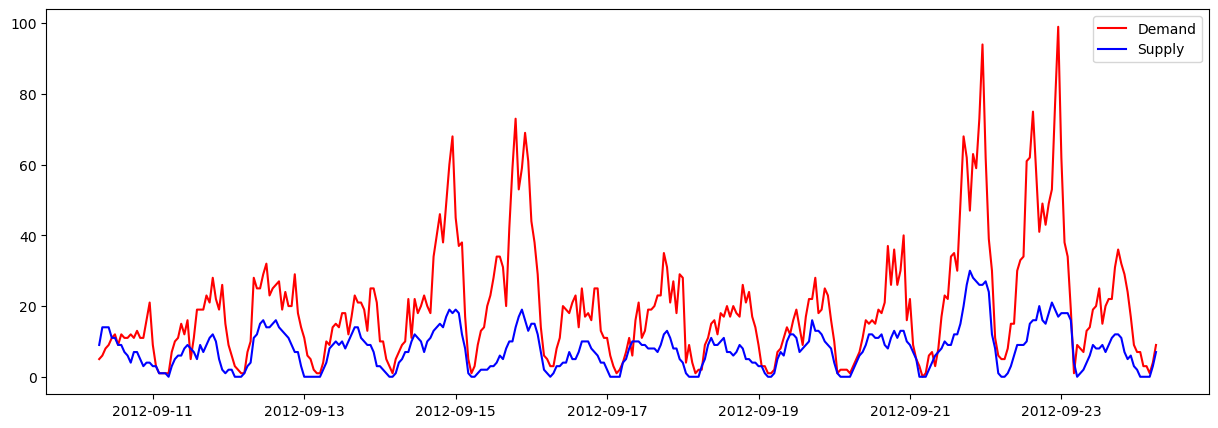

In [342]:
plt.figure(figsize=(15,5))
plt.plot(df['datetime'],df['Eyeballs '], color = 'red',label='Demand')
plt.plot(df['datetime'],df['Unique Drivers'], color = 'blue',label='Supply')
plt.legend()
plt.show()

Ans : False

8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [343]:
df.set_index('datetime',inplace=True)
df_rolling_sum = df['Zeroes '].rolling('72H').sum().shift(-71) / df['Eyeballs '].rolling('72H').sum().shift(-71)
df_rolling_sum.sort_values(ascending=False).head(1)

datetime
2012-09-15 05:00:00    0.292977
dtype: float64